# effect on fordbike trip duration
## by (abdallah mashaly)

## Investigation Overview

> A view of the characteristics of the trip and its effect

## Dataset Overview

> the data is made of 183412 rows each for a trip and it's characteristics

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# importing the bike data
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.dropna(inplace=True)
df['duration_sec']=df['duration_sec']/60
df.columns = df.columns.str.replace('duration_sec', 'duration_min')
df['member_birth_year']=2019-df['member_birth_year']
df.columns = df.columns.str.replace('member_birth_year', 'member_age')
df['start_time'] = pd.to_datetime(df['start_time']).dt.date
df['end_time'] = pd.to_datetime(df['end_time']).dt.date


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## which is more frequent customers or subscribers?

> nearly 90% of users are customers

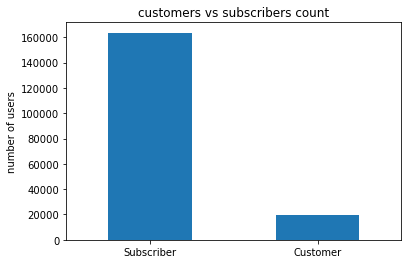

In [3]:
df.user_type.value_counts().plot(kind='bar')
plt.xticks(rotation=0);
plt.ylabel('number of users')
plt.title('customers vs subscribers count');

## whats the most common gender?

> approximately 75% of users are males 

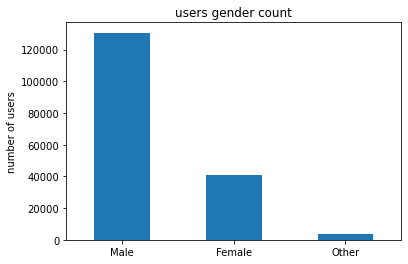

In [4]:
df.member_gender.value_counts().plot(kind='bar')
plt.xticks(rotation=0);
plt.ylabel('number of users')
plt.title('users gender count');

#  distribution of trip durations
> most trips takes from 5 to 10 minutes

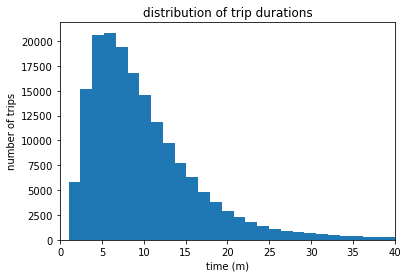

In [8]:
#duration distribution of trips
plt.hist(df.duration_min,bins=1000)
plt.xlim((0,40));
plt.xlabel('time (m)')
plt.ylabel('number of trips')
plt.title('distribution of trip durations');

## age distribution for members
> most users are between 20 and 40


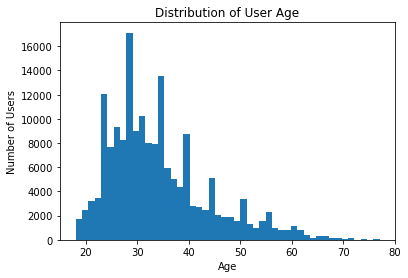

In [10]:
#age distribution for members
plt.hist(df.member_age,bins=100);
plt.xlim((15,80))
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users');

## relationship between age and duration
most trips with long duration are from users of age 20 to 40


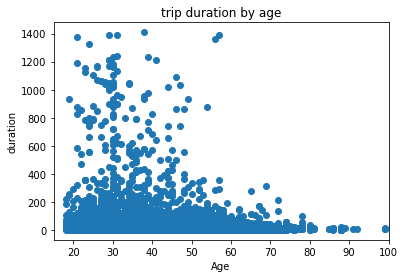

In [11]:
plt.scatter(y=df.duration_min,x=df.member_age)
plt.xlim((15,100))
plt.title('trip duration by age')
plt.xlabel('Age')
plt.ylabel('duration');

# duration by gender
> the average duration for a female seems the longest.

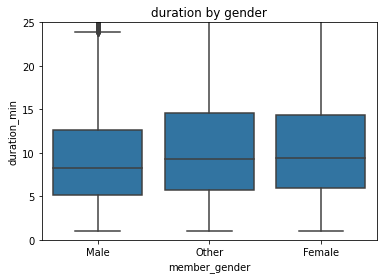

In [13]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_min', color = base_color)
plt.ylim((0,25))
plt.title('duration by gender');


# duration by user type
> the average duration for a customer is longer than a subscriber.


Text(0.5, 1.0, 'duration by user type')

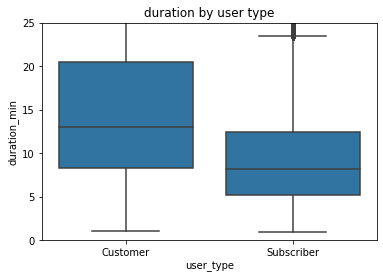

In [14]:
#duration by user type
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim((0,25));
plt.title('duration by user type');


# distribution of duration by age for user types
> old subscribers have a high trip duration even tho overall customers have a higher duration than subscribers 


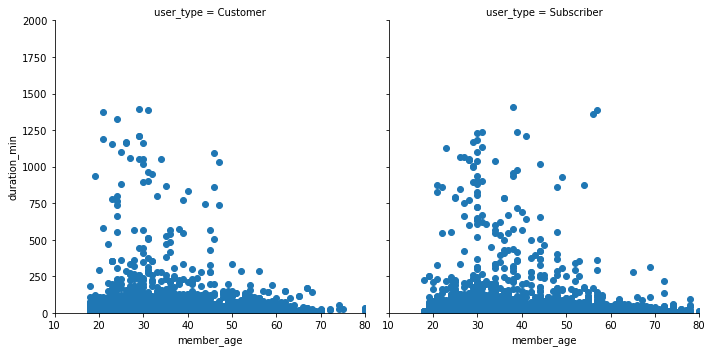

In [15]:
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [0, 2000])
user_type.map(plt.scatter, 'member_age', 'duration_min', alpha= 1);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [ ]:
jupyter nbconvert presentation.ipynb --to slides --no-prompt --TagRemovePreprocessor.remove_input_tags={\"to_remove\"} --post serve --SlidesExporter.reveal_theme=simple
